In [1]:
from rasterio.warp import calculate_default_transform, reproject, Resampling
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import rasterio
import rasterio.plot

In [2]:
sns.set()
sns.set_style("darkgrid", {"legend.frameon": True})
%matplotlib inline

In [3]:

fu = rasterio.open("ftunion2864.tif")
la = rasterio.open("lance2864.tif")
tfuwells = gpd.read_file(
    r"F:\Geology\WSGS\Projects\Unconformity or onlap\predictions\shapefiles\ftunion_KNN_predictions_prob.shp"
)
klawells = gpd.read_file(
    r"F:\Geology\WSGS\Projects\Unconformity or onlap\predictions\shapefiles\lance_KNN_predictions_prob.shp"
)
lance = gpd.read_file(r"shapefiles/lance_outcrop.shp")
ftun = gpd.read_file(r"shapefiles/ftunion_outcrop.shp")
faults = gpd.read_file(r"shapefiles/simp_faults.shp")
sections = gpd.read_file(r"shapefiles/crossection.shp",)

In [4]:
dst_crs = "EPSG:4326"
with rasterio.open("lance2864.tif") as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds
    )
    kwargs = src.meta.copy()
    kwargs.update(
        {
            "crs": dst_crs,
            "transform": transform,
            "width": width,
            "height": height,
        }
    )

    with rasterio.open("lance2864_reproject.tif", "w", **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest,
            )

In [5]:
fu = rasterio.open("ftunion2864_reproject.tif")
la = rasterio.open("lance2864_reproject.tif")

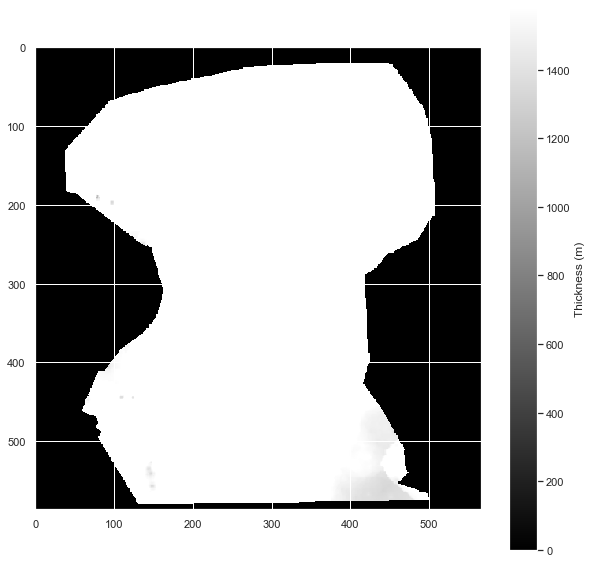

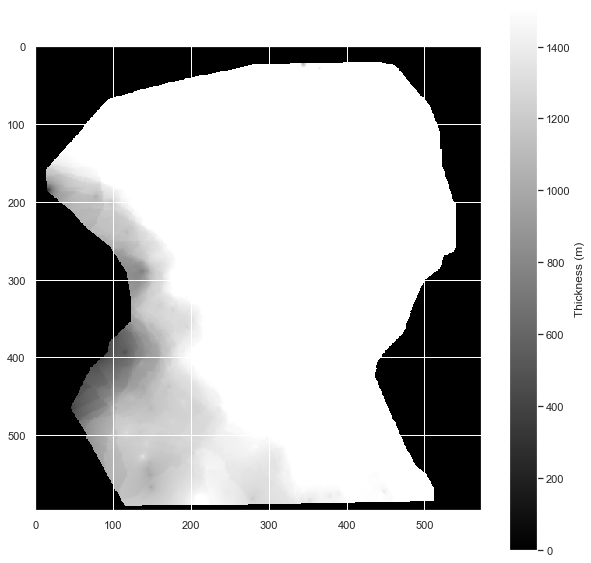

In [6]:
filepath = "ftunion2864.tif"
fig, ax = plt.subplots(figsize=(10, 10))

with rasterio.open(filepath) as src:
    e = src.read().astype(int)
plt.imshow(e[0], cmap="gray", vmin=0, vmax=5200 * 0.3048)
plt.colorbar(label="Thickness (m)")
plt.savefig("fortunioncolorbar.pdf")

filepath = "lance2864.tif"
fig, ax = plt.subplots(figsize=(10, 10))

with rasterio.open(filepath) as src:
    e = src.read().astype(int)
plt.imshow(e[0], cmap="gray", vmin=0, vmax=4961 * 0.3048)
plt.colorbar(label="Thickness (m)")
#plt.savefig("lancecolorbar.pdf")

In [7]:
tfuwells = tfuwells.to_crs("epsg:4326")
klawells = klawells.to_crs("epsg:4326")
lance = lance.to_crs("epsg:4326")
ftun = ftun.to_crs("epsg:4326")
faults = faults.to_crs("epsg:4326")
sections = sections.to_crs("epsg:4326")

C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\machinelearning\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax 

In [8]:
truncation_color = "#ffffbf"
onlap_color = "#2c7bb6"
horiz_color = "#d7191c"


truncCmap = LinearSegmentedColormap.from_list('mycmap', ['#ffffff', truncation_color])
onlapCmap = LinearSegmentedColormap.from_list('mycmap', ['#ffffff', onlap_color])
horizCmap = LinearSegmentedColormap.from_list('mycmap', ['#ffffff', horiz_color])

In [9]:
fthoriz = tfuwells[(tfuwells.horiz_prob > 0.0)]
lahoriz = klawells[(klawells.horiz_prob > 0.0)]

Text(55.0, 0.5, 'Latitude')

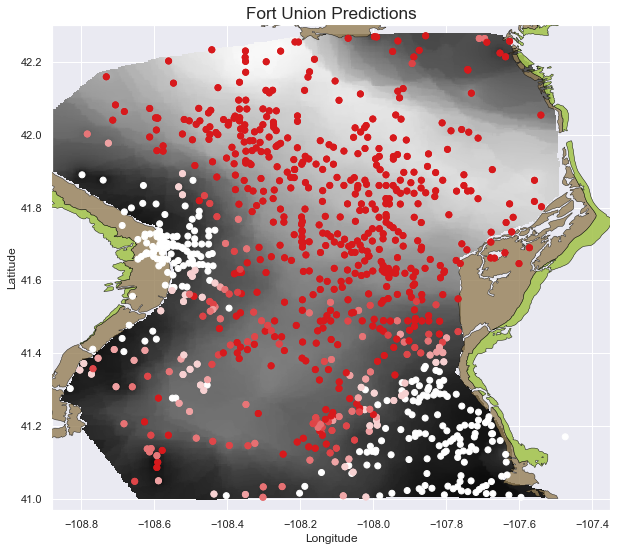

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
rasterio.plot.show(fu, ax=ax, cmap="gray", zorder=1)
tfuwells.plot(
    ax=ax, column="horiz_prob", cmap=horizCmap, vmin=0, vmax=1, zorder=4
)
fthoriz.plot(
     ax=ax, column="horiz_prob", cmap=horizCmap, vmin=0, vmax=1, zorder=5
 )

kwarg2s = {
    "facecolor": "#957F56",
    "edgecolor": "black",
    "linewidth": 0.5,
    "hatch": "",
}
ftun.plot(ax=ax, zorder=3, label="Fort Union Outcrop", alpha=0.8, **kwarg2s)
kwarg3s = {
    "facecolor": "#A6C551",
    "edgecolor": "black",
    "linewidth": 0.5,
    "hatch": "",
}
lance.plot(ax=ax, **kwarg3s, zorder=3, alpha=0.9) #lance outcrop
# tfuwells[tfuwells.probabilit < 0.6].plot(ax=ax, zorder=7, color='none', edgecolor='red', label='Probability < 0.6', markersize=80)

# plt.legend()

plt.title("Fort Union Predictions", size="xx-large")
plt.xlim(-108.88, -107.35)
plt.ylim(40.97, 42.3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
#plt.savefig("fortunion_3.pdf", bbox_inches="tight")


No handles with labels found to put in legend.


Text(55.0, 0.5, 'Northing (m)')

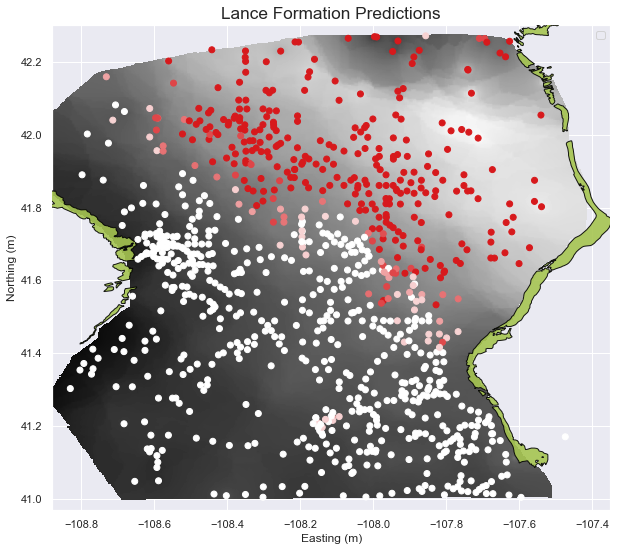

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
rasterio.plot.show(la, ax=ax, cmap="gray", zorder=1)
klawells.plot(
    ax=ax, column="horiz_prob", cmap=horizCmap, vmin=0, vmax=1, zorder=4
)
#lahoriz.plot(
#    ax=ax, column="horiz_prob", cmap=horizCmap, vmin=0, vmax=1, zorder=5
#)
lance.plot(ax=ax, color="#A6C551", edgecolor="black", zorder=3, alpha=0.9)
plt.legend()
plt.title("Lance Formation Predictions", size="xx-large")
plt.xlim(-108.88, -107.35)
plt.ylim(40.97, 42.3)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
#plt.savefig("lance_3.pdf", bbox_inches="tight")

In [12]:
klawells["form"] = "Kl"
tfuwells["form"] = "Tfu"
full = pd.DataFrame(klawells.append(tfuwells))

In [13]:
klawells.columns

Index(['thickness', 'thicknes_1', 'thicknes_2', 'thicknes_3', 'thicknes_4',
       'thicknes_5', 'thicknes_6', 'thicknes_7', 'thicknes_8', 'thicknes_9',
       'thicknes10', 'thicknes11', 'thicknes12', 'thicknes13', 'thicknes14',
       'thicknes15', 'thicknes16', 'thicknes17', 'thicknes18', 'thicknes19',
       'thicknes20', 'thicknes21', 'thicknes22', 'thicknes23', 'thicknes24',
       'thicknes25', 'thicknes26', 'thicknes27', 'thicknes28', 'thicknes29',
       'thicknes30', 'thicknes31', 'thicknes32', 'thicknes33', 'thicknes34',
       'thicknes35', 'thicknes36', 'thicknes37', 'thicknes38', 'thicknes39',
       'thicknes40', 'thicknes41', 'thicknes42', 'thicknes43', 'thicknes44',
       'thicknes45', 'thicknes46', 'thicknes47', 'thicknes48', 'thicknes49',
       'thicknes50', 'thicknes51', 'thicknes52', 'thicknes53', 'thicknes54',
       'thicknes55', 'thicknes56', 'thicknes57', 'thicknes58', 'thicknes59',
       'thicknes60', 'thicknes61', 'thicknes62', 'thicknes63', 'thicknes64',


In [16]:
tfuwells['class'].value_counts(sort=False)

0    242
1     55
2    591
Name: class, dtype: int64

In [15]:
klawells['class'].value_counts(sort=False)

0    472
1    112
2    304
Name: class, dtype: int64

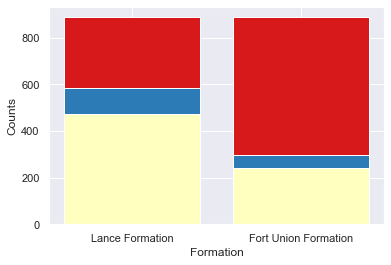

In [42]:

names = ("Lance Formation", "Fort Union Formation")
plt.bar(
    [0], klawells['class'].value_counts(sort=False).values[0], color=truncation_color
)  # truncation
plt.bar(
    [0],
    klawells['class'].value_counts(sort=False).values[1],
    color=onlap_color,
    bottom=klawells['class'].value_counts(sort=False).values[0],
)  # onlap
plt.bar(
    [0],
    klawells['class'].value_counts(sort=False).values[2],
    color=horiz_color,
    bottom=klawells['class'].value_counts(sort=False).values[0]
    + klawells['class'].value_counts(sort=False).values[1],
)  # horizontal

plt.bar([1], tfuwells['class'].value_counts(sort=False).values[0], color=truncation_color)
plt.bar(
    [1],
    tfuwells['class'].value_counts(sort=False).values[1],
    color=onlap_color,
    bottom=tfuwells['class'].value_counts(sort=False).values[0],
)
plt.bar(
    [1],
    tfuwells['class'].value_counts(sort=False).values[2],
    color=horiz_color,
    bottom=tfuwells['class'].value_counts(sort=False).values[0]
    + tfuwells['class'].value_counts(sort=False).values[1],
)


plt.xticks([0, 1], names)
plt.xlabel("Formation")
plt.ylabel("Counts")
plt.savefig("valuecounts histogram.pdf")

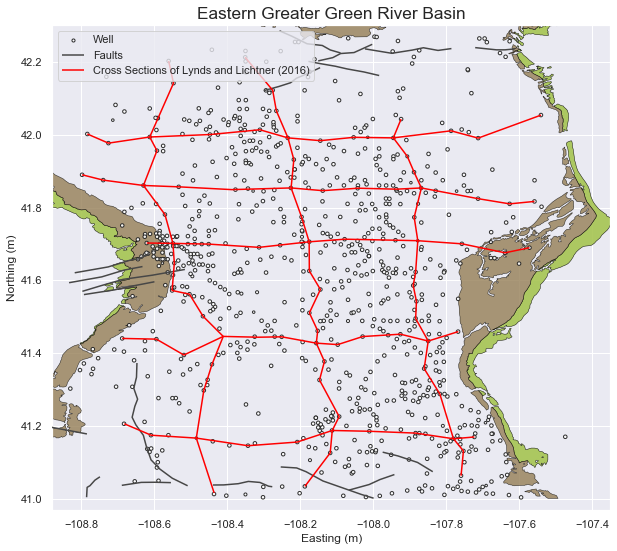

In [124]:
fig, ax = plt.subplots(figsize=(10, 10))
tfuwells.plot(
    ax=ax,
    color="white",
    edgecolor="k",
    label="Well",
    legend=True,
    alpha=0.9,
    zorder=3,
)
kwarg2s = {
    "facecolor": "#957F56",
    "edgecolor": "black",
    "linewidth": 0.5,
    "hatch": "",
}
ftun.plot(ax=ax, zorder=2, label="Fort Union Outcrop", alpha=0.8, **kwarg2s)
kwarg3s = {
    "facecolor": "#A6C551",
    "edgecolor": "black",
    "linewidth": 0.5,
    "hatch": "",
}
lance.plot(ax=ax, **kwarg3s, zorder=1, alpha=0.9)
faults.plot(ax=ax, color="#474747", label="Faults", legend=True, zorder=4)
sections.plot(
    ax=ax,
    color="red",
    label="Cross Sections of Lynds and Lichtner (2016)",
    legend=True,
    zorder=5,
)
plt.legend()
plt.title("Eastern Greater Green River Basin", size="xx-large")
plt.xlim(-108.88, -107.35)
plt.ylim(40.97, 42.3)
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.savefig("easternbasin.pdf")